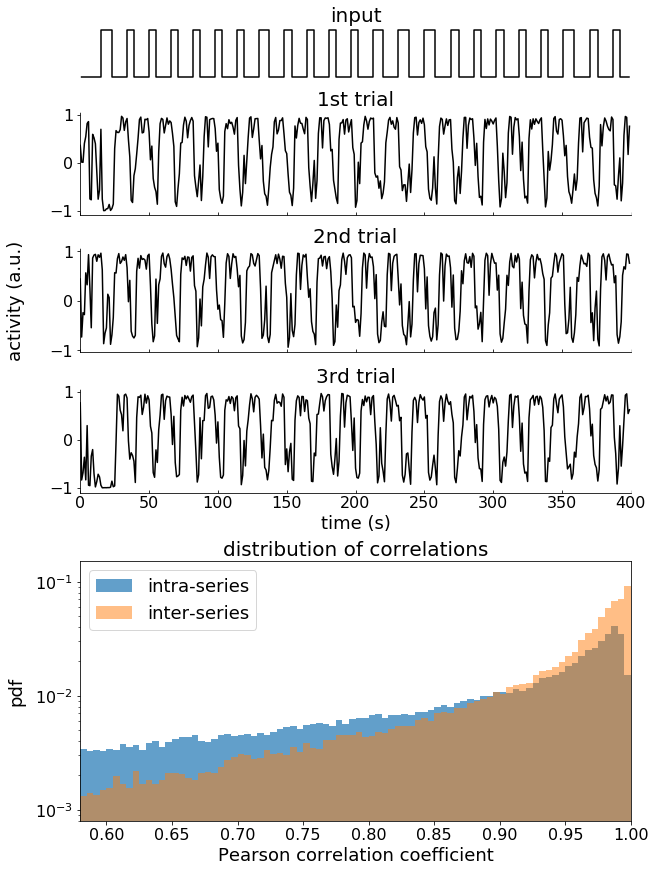

In [2]:
import matplotlib.pyplot as plt
import numpy as np

input_pulses = np.genfromtxt(open("fig5_Input.csv", "rb"), delimiter=",")
interseries_corr = np.genfromtxt(open("fig5_interseries_corr.csv", "rb"), delimiter=",")
intraseries_corr = np.genfromtxt(open("fig5_intraseries_corr.csv", "rb"), delimiter=",")
out1 = np.genfromtxt(open("fig5_NeuronDynamics1.csv", "rb"), delimiter=",")
out2 = np.genfromtxt(open("fig5_NeuronDynamics2.csv", "rb"), delimiter=",")
out3 = np.genfromtxt(open("fig5_NeuronDynamics3.csv", "rb"), delimiter=",")

neuron_chosen = 12 #12
pulses_amount = 20 #80

duration = 8
t0 = 15; t = 10
std = int(np.round(0.3*duration))
time = 400

wid=0.005

[response_intra_distribution,bins_intra] = np.histogram(intraseries_corr,bins=np.arange(-1,1+wid,wid))
[response_inter_distribution,bins_inter] = np.histogram(interseries_corr,bins=np.arange(-1,1+wid,wid))

response_intra_distribution = response_intra_distribution / np.sum(response_intra_distribution)
response_inter_distribution = response_inter_distribution / np.sum(response_inter_distribution)

mean_intra = np.mean(intraseries_corr)
mean_inter = np.mean(interseries_corr)

fSize = 18; lPad = 20; labelPos = -0.1; alpha = 0.5

width = 9
height = 12
fig = plt.figure(figsize=(width,height),constrained_layout=True)

gs = fig.add_gridspec(12, 1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1:3, 0])
ax3 = fig.add_subplot(gs[3:5, 0])
ax4 = fig.add_subplot(gs[5:7, 0])
ax5 = fig.add_subplot(gs[7:, 0])

tvec = np.arange(0,time)
newTime = [tvec[0]]
newInput = [input_pulses[0]]
for i in range(1, len(input_pulses[:time]) - 1):
    newInput.append(input_pulses[i])
    newTime.append(tvec[i])
    if (input_pulses[i] == 0 and input_pulses[i + 1] == 1):
        newInput.append(0)
        newTime.append(tvec[i+1])
    elif (input_pulses[i] == 1 and input_pulses[i + 1] == 0):
        newInput.append(0)
        newTime.append(tvec[i])

newInput.append(input_pulses[-1])
newTime.append(tvec[-1])

for spine in ax1.spines.values():
    spine.set_edgecolor('white')

ax1.plot(newTime,newInput,color='black')
ax1.set_xlim(0,time)
ax1.set_title('input',fontsize=fSize+2)
ax1.set_facecolor('xkcd:white')
ax1.tick_params(axis=('x'), colors='white')
ax1.tick_params(axis=('y'), colors='white')
ax1.set_yticklabels([])
ax1.set_xticklabels([])

ax2.spines['top'].set_color('white'); ax2.spines['right'].set_color('white')
ax2.set_title('1st trial',fontsize=fSize+2)
ax2.plot(out1[neuron_chosen,:time],color='black')
ax2.set_xlim(0,time)
ax2.set_facecolor('xkcd:white')
ax2.tick_params(axis='x', direction='in', bottom=True, top=False, labelbottom=False)
ax2.tick_params(labelsize=fSize-2)

ax3.spines['top'].set_color('white'); ax3.spines['right'].set_color('white')
ax3.set_title('2nd trial',fontsize=fSize+2)
ax3.plot(out2[neuron_chosen,:time],color='black')
ax3.set_xlim(0,time)
ax3.set_ylim()
ax3.set_facecolor('xkcd:white')
ax3.tick_params(axis='x', direction='in', bottom=True, top=False, labelbottom=False)
ax3.tick_params(labelsize=fSize-2)
ax3.set_ylabel('activity (a.u.)',fontsize=fSize)
ax3.get_yaxis().set_label_coords(labelPos,0.5)

ax4.spines['top'].set_color('white'); ax4.spines['right'].set_color('white')
ax4.set_title('3rd trial',fontsize=fSize+2)
ax4.plot(out3[neuron_chosen,:time],color='black')
ax4.set_xlim(0,time)
ax4.set_facecolor('xkcd:white')
ax4.set_xlabel('time (s)',fontsize=fSize)
ax4.tick_params(axis='x', direction='in', bottom=True, top=False, labelbottom=True, labelsize=fSize-2) 
ax4.tick_params(labelsize=fSize-2)

ax5.bar(bins_intra[:-1]+np.diff(bins_intra)/2, response_intra_distribution, alpha=0.7, width = wid, label='intra-series') 
ax5.bar(bins_inter[:-1]+np.diff(bins_inter)/2, response_inter_distribution, alpha=0.5, width = wid, label='inter-series')
ax5.tick_params(axis='x',  labelsize = fSize-2)
ax5.tick_params(axis='y',  labelsize = fSize-2)
ax5.legend(fontsize=fSize,loc='upper left')
ax5.set_title('distribution of correlations',fontsize=fSize+2)
ax5.set_ylabel('pdf',fontsize=fSize)
ax5.set_xlabel('Pearson correlation coefficient',fontsize=fSize)
ax5.set_xlim((0.58,1)) #(0.58,1)
ax5.get_yaxis().set_label_coords(labelPos,0.5)
ax5.set_yscale('log')
ax5.set_ylim((8*10**-4, 0.15))

plt.show()

fig.savefig('fig5.pdf')